# Problem Statement

The data for the given project is choosen from Kaggle. So basically we have given Rainfall data for Australia. In these data there are several kind of attributes, by using these attributes we have to predict whether the rainfall will occur tomorrow or not. So by using machine learning algorithm we have to predict the rainfall in Australia and also need to check wich algorithm has gives better accuracy.

### Attribute Description

Date - The date of observation

Location - The common name of the location of the weather station

MinTemp - The minimum temperature in degrees celsius

MaxTemp - The maximum temperature in degrees celsius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine - The number of hours of bright sunshine in the day.

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am - Direction of the wind at 9am

WindDir3pm - Direction of the wind at 3pm

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am - Humidity (percent) at 9am

Humidity3pm - Humidity (percent) at 3pm

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

Temp9am - Temperature (degrees C) at 9am

Temp3pm - Temperature (degrees C) at 3pm

RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

# Importing Relevant Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading the data

In [22]:
df= pd.read_csv('weatherAUS.csv')

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis

Checking for the null values

In [24]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [25]:
df.shape

(145460, 23)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [27]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


It gives min,max, count and std values for all the columns

In [28]:
df['Date']= pd.to_datetime(df['Date'])

In [29]:
df.describe(include='object') #It includes the object values in each column.

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


Some of the conclusions drawn from the above table are:
    
There are total 49 unique locations and 16 unique wind directions.

RainToday and RainTomorrow attribute has 2 unique values.

The top location is Canberra occuring 3436 times.

In [30]:
# Drop Sunshine, Evaporation, Cloud9am and Cloud3pm as most of the values are null


In [31]:
col = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']

In [32]:
df.drop(col, axis=1, inplace=True)

In [33]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [34]:
# Replace numerical columns with median
def replace_numerical(df):
    for col in df.select_dtypes(['int', 'float']):
        df[col] = df[col].fillna(df[col].median())
    return df
# Replace object columns with mode
def replace_object(df):
    for col in df.select_dtypes('object'):
        df[col] = df[col].fillna(method='ffill')
    return df

In [35]:
df = replace_numerical(df)
df = replace_object(df)

In [36]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Removed all missing values

In [37]:
corr=df.corr()

In [38]:
corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733358,0.102339,0.171899,0.173513,0.173055,-0.231310,0.006111,-0.423299,-0.432824,0.897829,0.698574
MaxTemp,0.733358,1.000000,-0.073563,0.066451,0.014389,0.049507,-0.498350,-0.498725,-0.308057,-0.396339,0.879335,0.968332
Rainfall,0.102339,-0.073563,1.000000,0.125109,0.084586,0.055688,0.220661,0.247946,-0.158812,-0.119397,0.010933,-0.077466
WindGustSpeed,0.171899,0.066451,0.125109,1.000000,0.578744,0.657975,-0.208803,-0.026804,-0.425819,-0.384140,0.145717,0.032375
WindSpeed9am,0.173513,0.014389,0.084586,0.578744,1.000000,0.512279,-0.268196,-0.031079,-0.215107,-0.165124,0.127491,0.004806
WindSpeed3pm,0.173055,0.049507,0.055688,0.657975,0.512279,1.000000,-0.143358,0.016275,-0.277277,-0.239274,0.161040,0.027529
Humidity9am,-0.231310,-0.498350,0.220661,-0.208803,-0.268196,-0.143358,1.000000,0.659290,0.131418,0.175914,-0.469774,-0.491242
Humidity3pm,0.006111,-0.498725,0.247946,-0.026804,-0.031079,0.016275,0.659290,1.000000,-0.025986,0.048527,-0.216951,-0.555606
Pressure9am,-0.423299,-0.308057,-0.158812,-0.425819,-0.215107,-0.277277,0.131418,-0.025986,1.000000,0.959663,-0.396885,-0.265026
Pressure3pm,-0.432824,-0.396339,-0.119397,-0.384140,-0.165124,-0.239274,0.175914,0.048527,0.959663,1.000000,-0.441184,-0.360083


# Data Visualization

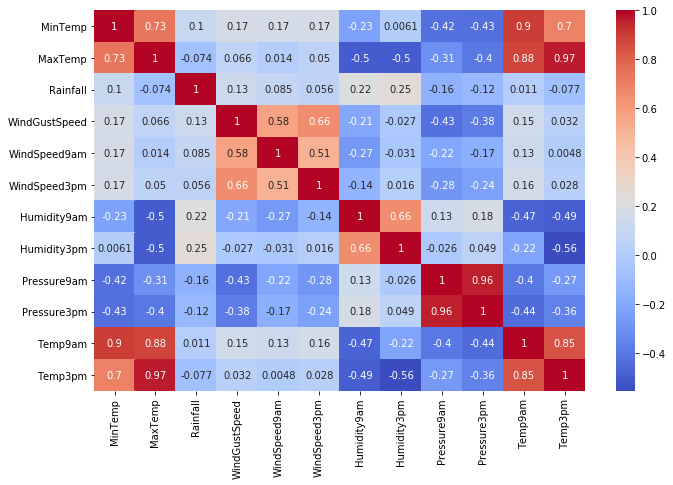

In [39]:
plt.figure(figsize=(11,7))
sns.heatmap(corr, cmap='coolwarm',annot=True)

### Distribution of location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

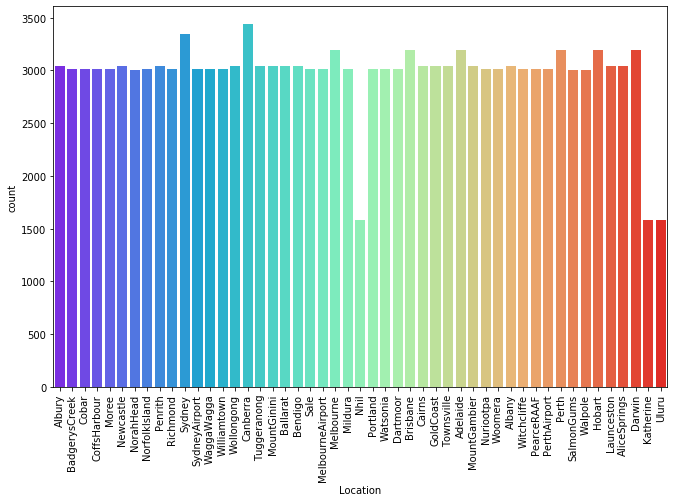

In [40]:
plt.figure(figsize=(11,7))
sns.countplot(df['Location'],palette='rainbow')
plt.xticks(rotation=90)

Most occured location is Canberra followed by Sydney.

Most of the locations have a frequency near 3000.

Nhil, Katherine and Uluru have occured the least.

### Distribution of MinTemp and MaxTemp

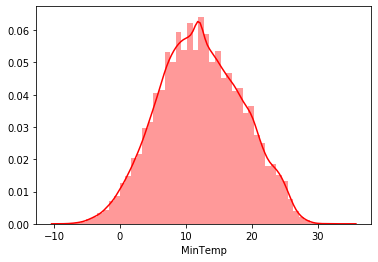

In [41]:
sns.distplot(df['MinTemp'], color='red')

Highest concentration of points for minimum temperature is between 10 to 12 degree Celcius.




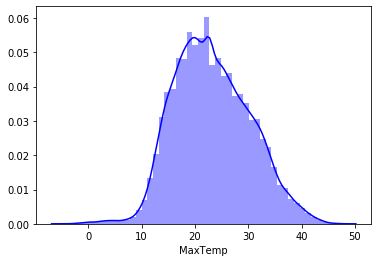

In [42]:
sns.distplot(df['MaxTemp'], color='blue')

Highest concentration of points for maximum temperature is between 18 to 22 degree Celcius.

### Rainfall distribution in each month

In [43]:
# Create a new dataframe rain_df
rainfall =[df['Date'].dt.year, df['Date'].dt.month, df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

<Figure size 576x288 with 0 Axes>

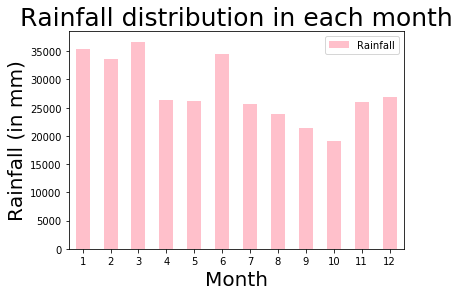

In [44]:
plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Maximum rainfall(greater than 35000 mm) occurs in March.

January and June also experience high rainfall(nearly 35000 mm) followed by February.

Minimum rainfall occurs in October followed by September.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 576x288 with 0 Axes>

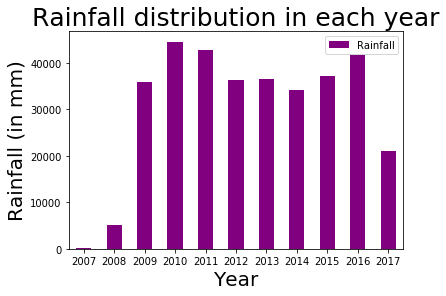

In [45]:
plt.figure(figsize=(8,4))
a = rain_df.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Rainfall distribution in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Maximum rainfall(greater than 40000 mm) occured in 2010 followed by 2011 and 2016.

2009, 2012, 2013, 2014 and 2015 experienced rainfall between 30000-40000 mm.

Least rainfall(less than 200 mm) occured in 2007 followed by 2008 and 2017(greather than 20000 mm).

### Distribution of WindGustDir, WindDir9am and WindDir3pm

Text(0.5, 1.0, 'Wind Gust Direction')

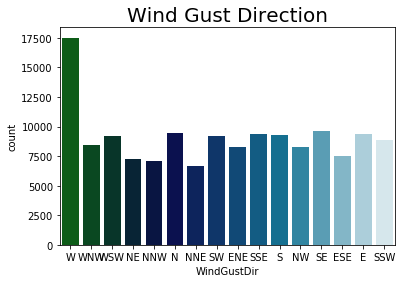

In [46]:
sns.countplot(df['WindGustDir'], palette='ocean')
plt.title("Wind Gust Direction", fontsize=20)


Wind Gust Direction for maximum records(nearly 17,500) is West.

Text(0.5, 1.0, 'Wind Direction at 9AM')

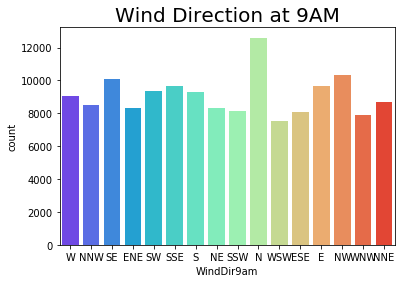

In [47]:
sns.countplot(df['WindDir9am'], palette='rainbow')
plt.title("Wind Direction at 9AM", fontsize=20)



Wind Direction at 9AM for maximum records is North followed by North-West and East.

Text(0.5, 1.0, 'Wind Direction at 3PM')

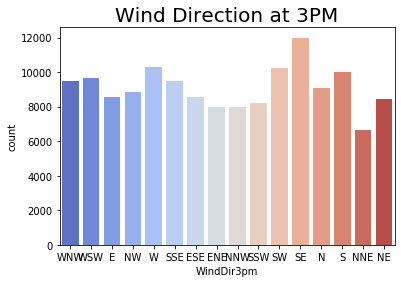

In [48]:
sns.countplot(df['WindDir3pm'], palette='coolwarm')
plt.title("Wind Direction at 3PM", fontsize=20)


Wind Direction at 3PM for maximum records is South East.

### Distribution of WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

Text(0.5, 1.0, 'Wind Direction at 9AM')

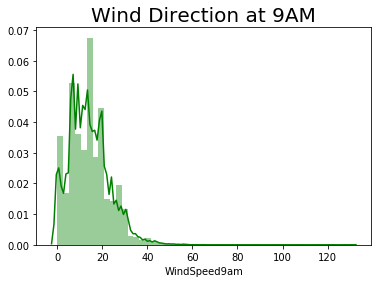

In [49]:
sns.distplot(df['WindSpeed9am'], color='green')
plt.title("Wind Direction at 9AM", fontsize=20)

Text(0.5, 1.0, 'Wind Speed at 3PM')

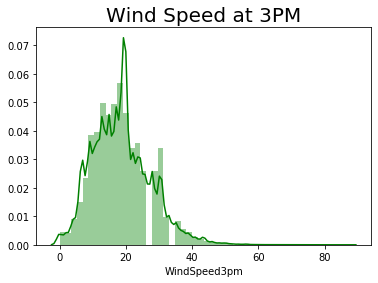

In [50]:
sns.distplot(df['WindSpeed3pm'], color='green')
plt.title("Wind Speed at 3PM", fontsize=20)

Text(0.5, 1.0, 'Humidity at 9AM')

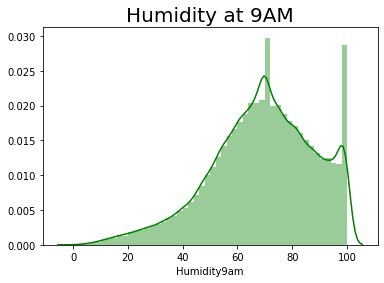

In [51]:
sns.distplot(df['Humidity9am'], color='green')
plt.title("Humidity at 9AM", fontsize=20)

Text(0.5, 1.0, 'Humidity at 3PM')

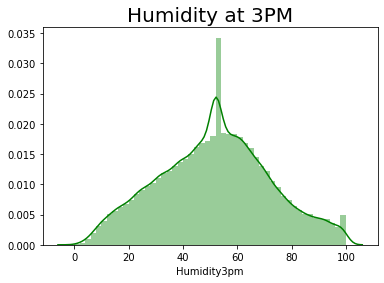

In [52]:
sns.distplot(df['Humidity3pm'], color='green')
plt.title("Humidity at 3PM", fontsize=20)

Text(0.5, 1.0, 'Pressure at 9AM')

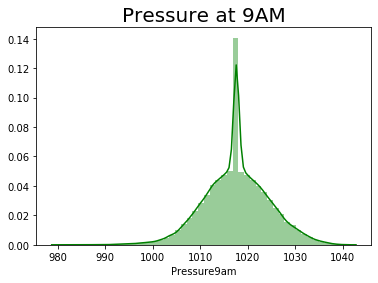

In [53]:
sns.distplot(df['Pressure9am'], color='green')
plt.title("Pressure at 9AM", fontsize=20)

Text(0.5, 1.0, 'Pressure at 3PM')

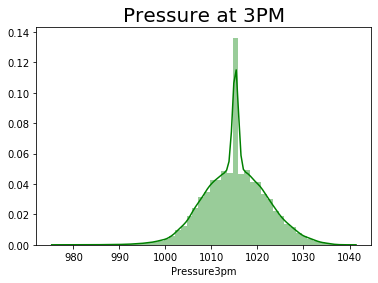

In [54]:
sns.distplot(df['Pressure3pm'], color='green')
plt.title("Pressure at 3PM", fontsize=20)

Text(0.5, 1.0, 'Temperature at 9AM')

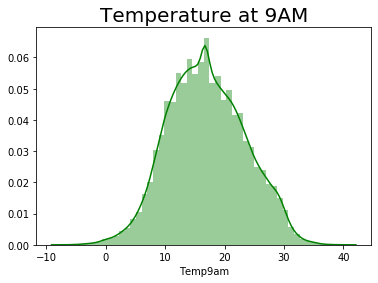

In [55]:
sns.distplot(df['Temp9am'], color='green')
plt.title("Temperature at 9AM", fontsize=20)

Text(0.5, 1.0, 'Temperature at 3PM')

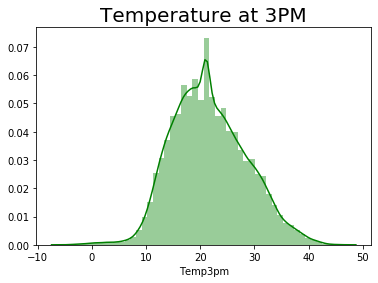

In [56]:
sns.distplot(df['Temp3pm'], color='green')
plt.title("Temperature at 3PM", fontsize=20)

Maximum wind speed at 9AM ranges from 10 to 20 km/hr whereas at 3PM it ranges from 15 to 22 km/hr.

Highest concentration of points for humidity at 9AM is between 60-80% whereas at 3PM it's 40-70%.

Highest concentration of points for pressure at 9AM is between 1015-1018 hpa and at 3PM it's between 1015-1017 hpa.

Maximum temperature at 9AM is between 16-18 degree Celcius and at 3PM it's between 21-23 degree Celcius.

In [57]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [58]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Analyzing RainToday and RainTomorrow

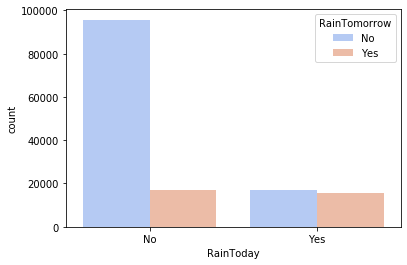

In [59]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'],palette='coolwarm')

For maximum records it didn't rain for both days.

For nearly 20,000 records it didn't rain today but rained tomorrow and rained for both days.

For nearly 20,000 records it rained today but didn't rain tomorrow.

In [60]:
#dropping the highly correlated and unnecessary columns

df.drop(['Temp3pm','Temp9am','Date','Location'],axis=1,inplace=True)

In [61]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,No,No


### Encoding categorical variables

In [62]:
category=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [64]:
for col in category:
    df[col] = le.fit_transform(df[col])

In [65]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,0,0


# Model Building

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=400)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
pred = rfc.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(confusion_matrix(y_test,pred))

[[32078  1707]
 [ 4796  5057]]


In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33785
           1       0.75      0.51      0.61      9853

    accuracy                           0.85     43638
   macro avg       0.81      0.73      0.76     43638
weighted avg       0.84      0.85      0.84     43638



In [75]:
rfc.score(X_test,y_test)

0.8509785049727302

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
prediction=dtree.predict(X_test)

In [78]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     33338
           1       0.53      0.51      0.52     10300

    accuracy                           0.78     43638
   macro avg       0.69      0.68      0.69     43638
weighted avg       0.77      0.78      0.78     43638



In [79]:
print(confusion_matrix(prediction,y_test))

[[28698  4640]
 [ 5087  5213]]


In [80]:
dtree.score(X_test,y_test)

0.7770979421605023

In [81]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
predict=lr.predict(X_test)

In [83]:
predict

array([0, 1, 0, ..., 0, 0, 0])

In [84]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     37245
           1       0.46      0.71      0.56      6393

    accuracy                           0.84     43638
   macro avg       0.70      0.78      0.73     43638
weighted avg       0.87      0.84      0.85     43638



In [85]:
print(confusion_matrix(predict,y_test))

[[31923  5322]
 [ 1862  4531]]


In [86]:
lr.score(X_test,y_test)

0.8353728401851597

## Conclusion

So here we have got the accuracy around 85% where we have predicted the rainfall tomorrow will occur or not.We have also predicted the values pretty much good as we can observe through confusion matrix where the probability of true positive and true negative is more compare to FP and FN.
So by using some visualization techniques and EDA process we have created the data in such format that we are able to do furter modeling trhough which we have predicted whether the rainfall will occur tomorrow or not.
In these we have use three types of algorithms Random Forest, Logistic Regression and Decision Tree to check which algorithm gives accurate result. Out of these three Random Forest have given great accuracy.